# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [3]:
import pandas as pd
import re
import seaborn as sns
import scipy.stats as stats

In [4]:
vgsales = pd.read_csv('vgsales.csv')

In [5]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Вопрос 1
Нулевая гипотеза: средняя оценка критиков для игр в жанре спорт >= 75

Альтернативная гипотеза: средняя оценка критиков для игр в жанре спорт < 75

alpha = 5%

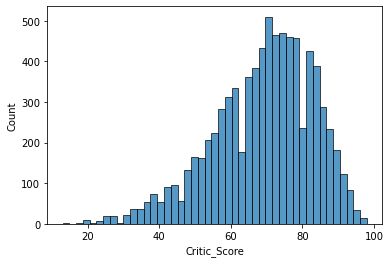

In [6]:
#Это чтобы посмотреть, по какой шкале критики ставят оценки.
sns.histplot(data=vgsales, x='Critic_Score');

In [7]:
#Смотрю, как обозначаются жанры.
vgsales.groupby(vgsales.Genre).count()

,Name,Platform,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Genre,,,,,,,,,,,,,,,
Action,3370,3370,3308,3364,3370,3370,3370,3370,3370,1890,1890,2206,1830,2226,2188
Adventure,1303,1303,1293,1299,1303,1303,1303,1303,1303,323,323,459,300,469,446
Fighting,849,849,837,847,849,849,849,849,849,409,409,438,399,440,438
Misc,1750,1750,1721,1723,1750,1750,1750,1750,1750,523,523,888,439,886,882
Platform,888,888,878,887,888,888,888,888,888,497,497,567,428,569,569
Puzzle,580,580,569,580,580,580,580,580,580,224,224,339,128,347,342
Racing,1249,1249,1226,1248,1249,1249,1249,1249,1249,742,742,874,641,884,872
Role-Playing,1500,1500,1483,1499,1500,1500,1500,1500,1500,737,737,773,743,788,777
Shooter,1323,1323,1296,1321,1323,1323,1323,1323,1323,944,944,1023,924,1025,1019


In [8]:
#Получаю выборку для жанра спорт.
vgsales_sport = vgsales.where(vgsales.Genre=='Sports').dropna(subset=['Critic_Score'])
print(vgsales_sport.head())
print(vgsales_sport['Critic_Score'].mean())

                 Name Platform  Year_of_Release   Genre        Publisher  \
0          Wii Sports      Wii           2006.0  Sports         Nintendo   
3   Wii Sports Resort      Wii           2009.0  Sports         Nintendo   
13            Wii Fit      Wii           2007.0  Sports         Nintendo   
15       Wii Fit Plus      Wii           2009.0  Sports         Nintendo   
77            FIFA 16      PS4           2015.0  Sports  Electronic Arts   

    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0      41.36     28.96      3.77         8.45         82.53          76.0   
3      15.61     10.93      3.28         2.95         32.77          80.0   
13      8.92      8.03      3.60         2.15         22.70          80.0   
15      9.01      8.49      2.53         1.77         21.79          80.0   
77      1.12      6.12      0.06         1.28          8.57          82.0   

    Critic_Count User_Score  User_Count  Developer Rating  
0           51.0    

In [9]:
#Делаю одновыборочный односторонний t-тест.
stats.ttest_1samp(vgsales_sport['Critic_Score'], 75, alternative='less')

Ttest_1sampResult(statistic=-7.5485926388546725, pvalue=4.3538182511739335e-14)

Вывод: Можно отвергнуть нулевую гипотезу даже при уровне значимости 1%. Средняя оценка критиками игр в жанре спорт ниже 75 баллов.

### Вопрос 2
2) Критикам нравятся больше игры на PC или на PS4?

Нулевая гипотеза: критикам игры на PC и PS4 нравятся одинаково.

Альтернативная гипотеза: критики отдают предпочтение одной из платформ.

alpha принимаю за 5%.

In [10]:
#Получаю выборки по платформам, считаю среднее.
vgsales_PC = vgsales[vgsales.Platform == 'PC'].dropna(subset=['Critic_Score'])
vgsales_PS4 = vgsales[vgsales.Platform =='PS4'].dropna(subset=['Critic_Score'])

print(f'Средняя оценка критиками PC = {vgsales_PC.Critic_Score.mean():.2f}')
print(f'Средняя оценка критиками PS4 = {vgsales_PS4.Critic_Score.mean():.2f}')

Средняя оценка критиками PC = 75.93
Средняя оценка критиками PS4 = 72.09


In [11]:
#Проверяю статистическую значимость различий по t-тесту Уэлча.
stats.ttest_ind(vgsales_PC.Critic_Score, vgsales_PS4.Critic_Score, equal_var=False)

Ttest_indResult(statistic=4.3087588262138725, pvalue=2.067249157283479e-05)

Вывод: значение p-value значительно ниже alpha => нулевую гипотезу можно отвергнуть => выборки значительно отличаются. Судя по средним оценкам критиков, они отдают предпочтение платформе PC.

### Вопрос 3
3) Критикам больше нравятся стрелялки или стратегии?

Нулевая гипотеза: критикам одинаково нравятся и стрелялки (Shooter), и стратегии (Strategy).

Альтернативная гипотеза: критики отдают предпочтение одному из жанров.

alpha по традиции равен 5%.

In [12]:
#Получаю выборки по жанрам, считаю среднее.
vgsales_shooter = vgsales[vgsales.Genre == 'Shooter'].dropna(subset=['Critic_Score'])
vgsales_strategy = vgsales[vgsales.Genre =='Strategy'].dropna(subset=['Critic_Score'])

print(f'Средняя оценка критиками стрелялок = {vgsales_shooter.Critic_Score.mean():.2f}')
print(f'Средняя оценка критиками стратегий = {vgsales_strategy.Critic_Score.mean():.2f}')

Средняя оценка критиками стрелялок = 70.18
Средняя оценка критиками стратегий = 72.09


In [13]:
#Проверяю статистическую значимость различий по t-тесту Уэлча.
stats.ttest_ind(vgsales_shooter.Critic_Score, vgsales_strategy.Critic_Score, equal_var=False)

Ttest_indResult(statistic=-2.2972408230640315, pvalue=0.021938989522304823)

P-value меньше alpha => нулевую гипотезу можно отвергнуть. Различия в выборках статистически значимы. Судя по средним величинам, критики выше оценивают стратегии.

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Приведите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Приведите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [14]:
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Solnotka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Solnotka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
spam = pd.read_csv('spam.txt')
spam_for_work = spam.copy()

In [16]:
#Привожу текст к нижнему регистру
spam_for_work['Message'] = spam_for_work['Message'].apply(lambda x: x.lower())

spam_for_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
#Убираю мусорные символы и делю сообщения на слова
def clean_trash(message):
    message = re.sub('[\W_]+', ' ', message)
    return message

spam_for_work['Message'] = spam_for_work['Message'].apply(clean_trash).apply(lambda x: x.split())

for message in spam_for_work['Message'][:10]:
    print(message)

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', '08452810075over18', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']
['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', '1', '50', 'to', 'rcv']
['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like

In [18]:
#Убираю стоп-слова
my_stopwords = set(stopwords.words('english'))

def clean_stopwords(lst):
    cleaned = [x for x in lst if x not in my_stopwords]
    return cleaned

spam_for_work['Message'] = spam_for_work['Message'].apply(clean_stopwords)

for message in spam_for_work['Message'][:10]:
    print(message)

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', '08452810075over18']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']
['freemsg', 'hey', 'darling', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', '1', '50', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']
['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', '9', 'copy', 'friends', 'callertune']
['winner', 'valued', 'network', 'customer', 'selected', 'receivea', '900', 'prize', 'reward', 'claim', 'call', 

In [19]:
#Провожу лемматизацию
wnl = WordNetLemmatizer()

def lemmatize_that(lst):
    lemmatized = [wnl.lemmatize(x) for x in lst]
    return lemmatized

spam_for_work['Message'] = spam_for_work['Message'].apply(lemmatize_that).apply(lambda x: ' '.join(x))

for message in spam_for_work['Message'][:10]:
    print(message)

go jurong point crazy available bugis n great world la e buffet cine got amore wat
ok lar joking wif u oni
free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18
u dun say early hor u c already say
nah think go usf life around though
freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send 1 50 rcv
even brother like speak treat like aid patent
per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune
winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour
mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030


In [20]:
#Преобразую сообщения в вектора TF-IDF

tfidf = TfidfVectorizer()

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(spam_for_work.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [21]:
#Разделяю выборку для модели логистической регрессии
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, spam_for_work.Category, test_size=0.30, random_state=42)

In [22]:
#Строю модель логистической регрессии
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [23]:
y_pred = lr.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [24]:
accuracy_score(y_test, y_pred)

0.958732057416268

In [25]:
confusion_matrix(y_test, y_pred, labels=['spam', 'ham'], sample_weight=None, normalize=None)

array([[ 158,   66],
       [   3, 1445]], dtype=int64)

In [34]:
result = pd.DataFrame([y_pred, y_test, spam.Message]).T.dropna(how='any')

result = result.rename(columns={0: 'Predicted', 1: 'Real', 2: 'Message'})

result = result.where(result.Real != result.Predicted).dropna(how='all')
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 17 to 1586
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Predicted  69 non-null     object
 1   Real       69 non-null     object
 2   Message    69 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [35]:
result

,Predicted,Real,Message
17,spam,ham,Eh u remember how 2 spell his name... Yes i di...
40,ham,spam,Pls go ahead with watts. I just wanted to be s...
47,ham,spam,"Fair enough, anything going on?"
74,ham,spam,U can call me now...
84,ham,spam,Yup next stop.
...,...,...,...
1525,ham,spam,Hi:)cts employee how are you?
1567,ham,spam,I am late. I will be there at
1569,ham,spam,Today is ACCEPT DAY..U Accept me as? Brother S...
1576,spam,ham,"Sounds gd... Haha... Can... Wah, u yan jiu so ..."
